In [1]:
import os
from pylab import *
from pysb.core import *
from pysb.bng import *
from pysb.integrate import *
import matplotlib.pyplot as plt
import numpy as np
from pysb.util import alias_model_components
from pysb.simulator import CupSodaSimulator
from pysb.simulator import ScipyOdeSimulator
from pysb.simulator.bng import BngSimulator
import sys
sys.path.append('../')
sys.path.append('../../../')
sys.path.append('/home/ildefog/main/Projects/NERM/')
sys.path.append('/home/ildefog/main/Projects/NERM/params_testing/')
from model_files.nerm_pvals_inits import model 
import pandas as pd
from scipy import stats
from pysb.simulator import SimulationResult
import logging
import os
from pysb.logging import setup_logger
from pysb.simulator.cupsoda import CupSodaSimulator
from pysb.simulator.scipyode import ScipyOdeSimulator
from sensitivity_analysis4 import InitialsSensitivity
from pysb.util import update_param_vals
from scipy.stats import norm,uniform, halfnorm
from pysb.tools.sensitivity_analysis import PairwiseSensitivity
os.environ['OMP_NUM_THREADS'] = '1'
from scipy.optimize import curve_fit

In [2]:
m1 = np.load('../../params_testing/necro_pars10k_mode1_5720_modcylda20.npy')
m2 = np.load('../../params_testing/necro_pars10k_mode2_5720_modcylda20.npy')
m3 = np.load('../../params_testing/necro_pars10k_mode3_5720_modcylda20.npy')
m4 = np.load('../../params_testing/necro_pars10k_mode4_5720_modcylda20.npy')

In [4]:
t = np.linspace(0,1800,500)
m = model.components
print(list(model.initial_conditions))

[(A20(brip=None), Parameter('A20_0', 9075.0)), (C8(bf=None, flip=None, state='I'), Parameter('C8_0', 3799.0)), (cIAP(btraf=None), Parameter('cIAP_0', 8986.0)), (CYLD(brip=None, btraf=None), Parameter('CYLD_0', 9075.0)), (FADD(bDD=None, bDED1=None, bDED2=None), Parameter('FADD_0', 3109.0)), (FLIP(bDED=None, state='A'), Parameter('FLIP_0', 3910.0)), (LUBAC(brip=None), Parameter('LUBAC_0', 7226.0)), (MLKL(bRHIM=None, state='unmod'), Parameter('MLKLa_0', 5544.0)), (RIP1(bscf=None, bub1=None, bub2=None, bub3=None, bDD=None, btraf=None, bRHIM=None, bMLKL=None, state='unmod'), Parameter('RIP1_0', 22044.0)), (RIP3(bRHIM=None, bDD=None, state='unmod'), Parameter('RIP3_0', 10654.0)), (TNF(brec=None), Parameter('TNF_0', 2326.0)), (TNFR(blig=None, brip=None, bDD=None), Parameter('TNFR_0', 4809.0)), (TRADD(brec=None, brip=None, state='unmod', bDD1=None, bDD2=None), Parameter('TRADD_0', 4696.0)), (TRAF(brip=None, bciap=None, bcyld=None, state='unmod'), Parameter('TRAF_0', 11776.0))]


In [5]:
solverwtm2 = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1wtm2  = solverwtm2.run(param_values=m2, num_processors = 20)
mode1df_wtm2 = mode1wtm2.dataframe

2022-01-13 16:31:00.677 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] Simulator created
2022-01-13 16:31:01.429 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] Equation mode set to "cython"
2022-01-13 16:31:01.551 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals_inits] Simulation(s) started
2022-01-13 16:31:01.781 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] Multi-processor (parallel) mode using 20 processes
2022-01-13 16:35:26.469 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals_inits] All simulation(s) complete
2022-01-13 16:35:26.471 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] SimulationResult constructor started
2022-01-13 16:35:28.942 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] SimulationResult constructor finished


In [12]:
thresh = 2772
ttdm2wt = []
for j in range(len(m2)):
    i_range = range(len(mode1df_wtm2.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_wtm2.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2wt.append(mode1df_wtm2.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2wt.append(np.inf)
for i in range(len(ttdm2wt)):
    if ttdm2wt[i] == np.inf:
        ttdm2wt[i] = 2100               

In [6]:
solverkdm2lubac = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1kdm2lubac   = solverkdm2lubac.run(initials = {m.LUBAC(brip=None):2167},
                                        param_values=m2, num_processors = 20)
mode1df_kdm2lubac  = mode1kdm2lubac.dataframe

2022-01-13 16:35:32.019 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] Simulator created
2022-01-13 16:35:32.024 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] Equation mode set to "cython"
2022-01-13 16:35:32.057 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals_inits] Simulation(s) started
2022-01-13 16:35:32.256 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] Multi-processor (parallel) mode using 20 processes
2022-01-13 16:39:42.651 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals_inits] All simulation(s) complete
2022-01-13 16:39:42.653 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] SimulationResult constructor started
2022-01-13 16:39:45.424 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] SimulationResult constructor finished


In [52]:
thresh = 2772
ttdm2lubkd = []
for j in range(len(m2)):
    i_range = range(len(mode1df_kdm2lubac.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_kdm2lubac.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2lubkd.append(mode1df_kdm2lubac.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2lubkd.append(np.inf)
for i in range(len(ttdm2lubkd)):
    if ttdm2lubkd[i] == np.inf:
        ttdm2lubkd[i] = 2100               

In [7]:
solveroem2lubac = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1oem2lubac  = solveroem2lubac.run(initials = {m.LUBAC(brip=None):72260},
                                        param_values=m2, num_processors = 20)
mode1df_oem2lubac = mode1oem2lubac.dataframe

2022-01-13 16:39:48.550 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] Simulator created
2022-01-13 16:39:48.555 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] Equation mode set to "cython"
2022-01-13 16:39:48.591 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals_inits] Simulation(s) started
2022-01-13 16:39:48.787 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] Multi-processor (parallel) mode using 20 processes
2022-01-13 16:44:00.194 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals_inits] All simulation(s) complete
2022-01-13 16:44:00.196 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] SimulationResult constructor started
2022-01-13 16:44:02.775 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] SimulationResult constructor finished


In [50]:
thresh = 2772
ttdm2luboe2 = []
for j in range(len(m2)):
    i_range = range(len(mode1df_oem2lubac.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_kdm2lubac.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2luboe2.append(mode1df_oem2lubac.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2luboe2.append(np.inf)
for i in range(len(ttdm2luboe2)):
    if ttdm2luboe2[i] == np.inf:
        ttdm2luboe2[i] = 2100               

In [35]:
solverkdm2a20 = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1kdm2a20   = solverkdm2a20.run(initials = {m.A20(brip=None):2772},
                                        param_values=m2, num_processors = 20)
mode1df_kdm2a20  = mode1kdm2a20.dataframe

2022-01-13 17:50:51.614 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] Simulator created
2022-01-13 17:50:51.625 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] Equation mode set to "cython"
2022-01-13 17:50:51.697 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals_inits] Simulation(s) started
2022-01-13 17:50:51.929 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] Multi-processor (parallel) mode using 20 processes
2022-01-13 17:55:05.843 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals_inits] All simulation(s) complete
2022-01-13 17:55:05.845 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] SimulationResult constructor started
2022-01-13 17:55:08.409 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] SimulationResult constructor finished


In [36]:
thresh = 2772
ttdm2a20kd = []
for j in range(len(m2)):
    i_range = range(len(mode1df_kdm2a20.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_kdm2a20.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2a20kd.append(mode1df_kdm2a20.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2a20kd.append(np.inf)
for i in range(len(ttdm2a20kd)):
    if ttdm2a20kd[i] == np.inf:
        ttdm2a20kd[i] = 2100               

In [37]:
solveroem2a20 = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1oem2a20  = solveroem2a20.run(initials = {m.A20(brip=None):90750},
                                        param_values=m2, num_processors = 20)
mode1df_oem2a20 = mode1oem2a20.dataframe

2022-01-13 17:59:05.052 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] Simulator created
2022-01-13 17:59:05.057 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] Equation mode set to "cython"
2022-01-13 17:59:05.093 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals_inits] Simulation(s) started
2022-01-13 17:59:05.291 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] Multi-processor (parallel) mode using 20 processes
2022-01-13 18:03:14.358 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals_inits] All simulation(s) complete
2022-01-13 18:03:14.360 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] SimulationResult constructor started
2022-01-13 18:03:17.160 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] SimulationResult constructor finished


In [38]:
thresh = 2772
ttdm2a20oe = []
for j in range(len(m2)):
    i_range = range(len(mode1df_oem2a20.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_oem2a20.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2a20oe.append(mode1df_oem2a20.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2a20oe.append(np.inf)
for i in range(len(ttdm2a20oe)):
    if ttdm2a20oe[i] == np.inf:
        ttdm2a20oe[i] = 2100               

In [39]:
solverkdm2cyld = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1kdm2cyld   = solverkdm2cyld.run(initials = {m.CYLD(brip=None, btraf=None):2772},
                                        param_values=m2, num_processors = 20)
mode1df_kdm2cyld  = mode1kdm2cyld.dataframe

2022-01-13 18:08:05.247 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] Simulator created
2022-01-13 18:08:05.252 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] Equation mode set to "cython"
2022-01-13 18:08:05.288 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals_inits] Simulation(s) started
2022-01-13 18:08:05.487 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] Multi-processor (parallel) mode using 20 processes
2022-01-13 18:12:20.836 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals_inits] All simulation(s) complete
2022-01-13 18:12:20.838 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] SimulationResult constructor started
2022-01-13 18:12:23.342 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] SimulationResult constructor finished


In [40]:
thresh = 2772
ttdm2cyldkd = []
for j in range(len(m2)):
    i_range = range(len(mode1df_kdm2cyld.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_kdm2cyld.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2cyldkd.append(mode1df_kdm2cyld.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2cyldkd.append(np.inf)
for i in range(len(ttdm2cyldkd)):
    if ttdm2cyldkd[i] == np.inf:
        ttdm2cyldkd[i] = 2100               

In [41]:
solveroem2cyld = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1oem2cyld  = solveroem2cyld.run(initials = {m.CYLD(brip=None, btraf=None):90750},
                                        param_values=m2, num_processors = 20)
mode1df_oem2cyld = mode1oem2cyld.dataframe

2022-01-13 18:16:44.813 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] Simulator created
2022-01-13 18:16:44.819 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] Equation mode set to "cython"
2022-01-13 18:16:44.853 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals_inits] Simulation(s) started
2022-01-13 18:16:45.053 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] Multi-processor (parallel) mode using 20 processes
2022-01-13 18:20:57.392 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals_inits] All simulation(s) complete
2022-01-13 18:20:57.393 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] SimulationResult constructor started
2022-01-13 18:20:59.839 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] SimulationResult constructor finished


In [42]:
thresh = 2772
ttdm2cyldoe = []
for j in range(len(m2)):
    i_range = range(len(mode1df_oem2cyld.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_oem2cyld.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2cyldoe.append(mode1df_oem2cyld.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2cyldoe.append(np.inf)
for i in range(len(ttdm2cyldoe)):
    if ttdm2cyldoe[i] == np.inf:
        ttdm2cyldoe[i] = 2100               

In [ ]:
fig, ax = plt.subplots(figsize = (6, 4))
for n in range(len(c2)):
    plt.plot(tspan, m3alldf100wt.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, 
             zorder = 1, color = 'blue', alpha= 0.4)
#     plt.plot(tspan, m1alldf100lubackd.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, 
#              zorder = 1, color = 'orange', alpha = 0.25)
#     plt.plot(tspan, m1alldf100lubacoe.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, 
#              zorder = 1, color = 'green', alpha = 0.25)
# colormap = plt.cm.Reds #nipy_spectral, Set1,Paired   
# colors = [colormap(i) for i in np.linspace(0, 1,len(ax.lines))]
# for i,j in enumerate(ax.lines):
#     j.set_color(colors[i])
# ax1.legend(loc=2)    
plt.xlabel("Time (m)", fontsize=15)
plt.ylabel("[pMLKL] Normalized", fontsize=15)
plt.xlim(xmin = 0, xmax = 1800)
plt.ylim(ymin = 0)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.grid(False)
# ax.set_xticks([0, 5, 10, 15, 20, 24])
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='orange', lw=4),
               Line2D([0], [0], color='green', lw=4)]
plt.legend(custom_lines, ['WT', 'LUBACKD', 'LUBACOE'], prop={'size': 10}, loc = 'best')
plt.tight_layout()
# plt.savefig('mode2_lubackdoe_testingplots_linesmin.pdf')
plt.show() 

In [23]:
ttdm2a20kd

[2100, 2100, 2100, 2100, 2100, 2100, 2100, 2100, 2100]

In [53]:
print(len(ttdm2wt))
print(len(ttdm2lubkd))
print(len(ttdm2luboe2))
print(len(ttdm2a20kd))
print(len(ttdm2a20oe))
print(len(ttdm2cyldoe))
print(len(ttdm2cyldkd))

3489
3489
3489
3489
3489
3489
3489


In [59]:
#['lightcoral', 'lightseagreen', 'mediumpurple', 'peru']
mode2wt = pd.DataFrame({'WT': ttdm2wt,
                       'species':'wt'})
mode2lub = pd.DataFrame({'KD': ttdm2lubkd,
                         'OE': ttdm2luboe,
                        'species': 'lubac'})
mode2a20 = pd.DataFrame({'KD': ttdm2a20kd,
                          'OE': ttdm2a20oe,
                        'species': 'a20'})
mode2cyld = pd.DataFrame({'KD': ttdm2cyldkd,
                          'OE': ttdm2cyldoe,
                        'species': 'cyld'})
framesm2 = [mode2wt,mode2lub, mode2a20, mode2cyld]
# # framesm2 = [mode2wt,mode2dfn, mode2dfn2,mode2dfn3,mode2dfn4,mode2dfn5]
# # framesm3 = [mode2wt,mode2dfn, mode2dfn2]
# # framesm4 = [mode2wt,mode2dfn]
dfmode2 = pd.DataFrame(data = pd.concat(framesm2), columns = ['species','WT','KD','OE'])
dfm2 = pd.melt(dfmode2, id_vars=["species"])
# dfclus2 = pd.DataFrame(data = pd.concat(framesm2), columns = ['species','KD','WT','OE'])
# dfclus3 = pd.DataFrame(data = pd.concat(framesm3), columns = ['species','KD','WT','OE'])
# dfclus4 = pd.DataFrame(data = pd.concat(framesm4), columns = ['species','KD','WT','OE'])
# dfclus2nn = pd.melt(dfclus2nn)

No handles with labels found to put in legend.


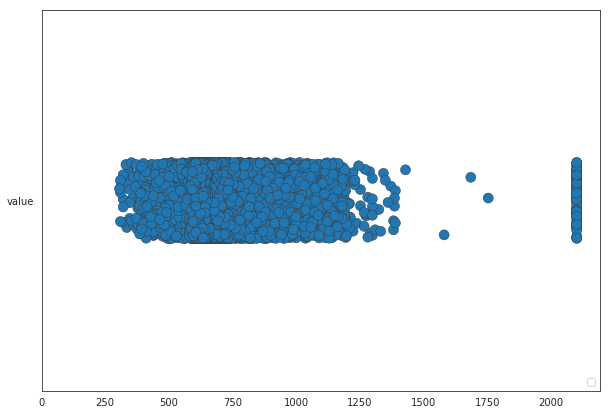

In [60]:
import seaborn as sns
plt.figure(figsize = (10,7))
# sns.stripplot(data=mode2wt, orient = 'h',linewidth=0.5,size=10)
sns.stripplot(data=dfm2, orient = 'h',linewidth=0.5,size=10)
plt.xlim(xmin = 1)
plt.legend(loc = 'lower right')

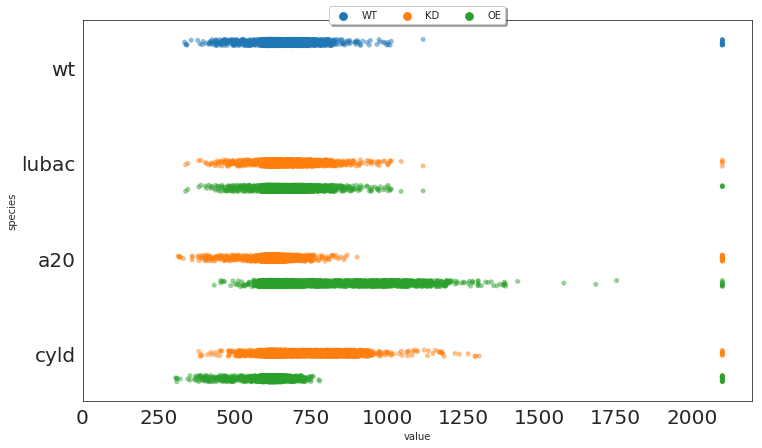

In [80]:
plt.figure(figsize = (12,7))
b = sns.stripplot(data=dfm2, y="species", x="value", hue="variable", marker="o", alpha=0.5,dodge=True)#, orient = 'h',linewidth=0.5,size=5)
plt.xlim(xmin = 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
b.tick_params(labelsize=20)
# plt.xlim(xmin = 250, xmax = 1000)

In [3]:
sns.set_style("white")
kwargs = dict(hist_kws={'alpha':.5}, kde_kws={'linewidth':0.5})
# print('clus', np.mean(CI_k63))
# print('clus', np.std(CI_k63))
fig, ax = plt.subplots()
# sns.boxplot(x = 'variable', y = 'value', label ='WT',color=["red",'green'], bins=10, **kwargs, kde = True)
# g = sns.boxplot(y='variable',x='value',data=dfclus2n, showfliers=True, boxprops=dict(alpha=1))
g = sns.stripplot(y='variable',x='value',data=dfm2, 
                        marker="o", alpha=0.3, order=['WT', 'LUBACKD','LUBACOE','A20KD', 'A20OE','CYLDKD', 'CYLDOE'])
# g = sns.stripplot(y='variable',x='value',data=dfclus2n, 
#                         marker="o", alpha=0.3, order=["WT", "LUBACKD", "LUBACOE"], color =['red', 'orange', 'blue'])
# g = sns.stripplot(y='variable',x='value',data=dfclus2n, 
#                         marker="o", alpha=0.3, order=["WT", "LUBACKD", "LUBACOE"], color =['red', 'orange', 'blue'])
# sns.distplot(mode2_lubacoe, label = 'LUBAC KD',color="blue", bins=10, **kwargs, kde = True)
# sns.distplot(mode2_lubackd, label = 'LUBAC OE',color="green", bins=10, **kwargs, kde = True)
# sns.distplot(CI_a20, label='uncluster',color="orange", bins=25, **kwargs)
# sns.distplot(CI_cyld, label='uncluster',color="deeppink", bins=25, **kwargs)
plt.xlabel('Time (m)')
plt.ylabel('Species')
plt.legend(loc = 'best')
# plt.xlim(xmin = 1, xmax = 1000)
# ax.set_yticks([1, 1.5, 2])
# plt.ylim(ymax = 0.04)
# plt.xticks([0, 5, 10, 15, 20, 24])
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
plt.tight_layout()
# plt.savefig('mode2_lubackdoe_testingplots_strip.pdf')
plt.show()

NameError: name 'sns' is not defined

In [2]:
list(model.initial_conditions)

NameError: name 'model' is not defined

In [ ]:
solverkdm2lubac = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1kdm2lubac   = solverkdm2lubac.run(initials = {m.LUBAC(brip=None):2167},
                                        param_values=m2, num_processors = 20)
mode1df_kdm2lubac  = mode1kdm2lubac.dataframe

In [ ]:
thresh = 2772
ttdm2lubkd = []
for j in range(len(m2)):
    i_range = range(len(mode1df_kdm2lubac.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_kdm2lubac.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2lubkd.append(mode1df_kdm2lubac.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2lubkd.append(np.inf)
for i in range(len(ttdm2lubkd)):
    if ttdm2lubkd[i] == np.inf:
        ttdm2lubkd[i] = 2100               

In [ ]:
solveroem2lubac = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1oem2lubac  = solveroem2lubac.run(initials = {m.LUBAC(brip=None):72260},
                                        param_values=m2, num_processors = 20)
mode1df_oem2lubac = mode1oem2lubac.dataframe

In [ ]:
thresh = 2772
ttdm2luboe2 = []
for j in range(len(m2)):
    i_range = range(len(mode1df_oem2lubac.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_kdm2lubac.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2luboe2.append(mode1df_oem2lubac.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2luboe2.append(np.inf)
for i in range(len(ttdm2luboe2)):
    if ttdm2luboe2[i] == np.inf:
        ttdm2luboe2[i] = 2100               

In [ ]:
solverkdm2a20 = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1kdm2a20   = solverkdm2a20.run(initials = {m.A20(brip=None):2772},
                                        param_values=m2, num_processors = 20)
mode1df_kdm2a20  = mode1kdm2a20.dataframe

In [ ]:
thresh = 2772
ttdm2a20kd = []
for j in range(len(m2)):
    i_range = range(len(mode1df_kdm2a20.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_kdm2a20.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2a20kd.append(mode1df_kdm2a20.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2a20kd.append(np.inf)
for i in range(len(ttdm2a20kd)):
    if ttdm2a20kd[i] == np.inf:
        ttdm2a20kd[i] = 2100               

In [ ]:
solveroem2a20 = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1oem2a20  = solveroem2a20.run(initials = {m.A20(brip=None):90750},
                                        param_values=m2, num_processors = 20)
mode1df_oem2a20 = mode1oem2a20.dataframe

In [ ]:
thresh = 2772
ttdm2a20oe = []
for j in range(len(m2)):
    i_range = range(len(mode1df_oem2a20.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_oem2a20.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2a20oe.append(mode1df_oem2a20.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2a20oe.append(np.inf)
for i in range(len(ttdm2a20oe)):
    if ttdm2a20oe[i] == np.inf:
        ttdm2a20oe[i] = 2100               

In [ ]:
solverkdm2cyld = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1kdm2cyld   = solverkdm2cyld.run(initials = {m.CYLD(brip=None, btraf=None):2772},
                                        param_values=m2, num_processors = 20)
mode1df_kdm2cyld  = mode1kdm2cyld.dataframe

In [ ]:
thresh = 2772
ttdm2cyldkd = []
for j in range(len(m2)):
    i_range = range(len(mode1df_kdm2cyld.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_kdm2cyld.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2cyldkd.append(mode1df_kdm2cyld.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2cyldkd.append(np.inf)
for i in range(len(ttdm2cyldkd)):
    if ttdm2cyldkd[i] == np.inf:
        ttdm2cyldkd[i] = 2100               

In [ ]:
solveroem2cyld = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1oem2cyld  = solveroem2cyld.run(initials = {m.CYLD(brip=None, btraf=None):90750},
                                        param_values=m2, num_processors = 20)
mode1df_oem2cyld = mode1oem2cyld.dataframe

In [ ]:
thresh = 2772
ttdm2cyldoe = []
for j in range(len(m2)):
    i_range = range(len(mode1df_oem2cyld.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_oem2cyld.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2cyldoe.append(mode1df_oem2cyld.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2cyldoe.append(np.inf)
for i in range(len(ttdm2cyldoe)):
    if ttdm2cyldoe[i] == np.inf:
        ttdm2cyldoe[i] = 2100               